In [1]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
#Load the data set
#top 30 cyptocurrencies on yahoo api. columns represent stock prices on ADJ close. Load the CCI30 Index on Close
stock_prices = pd.read_csv('./Data/Yahoo_Stock_Prices.csv')
CCI30 = pd.read_csv('./Data/cci30_OHLCV.csv')

In [3]:
stock_prices.set_index('Date', inplace = True)
stock_prices

,ADA-USD,BCH-USD,BNB-USD,BTC-USD,DOGE-USD,EOS-USD,ETC-USD,ETH-USD,FIL-USD,LINK-USD,LTC-USD,THETA-USD,TRX-USD,USDC-USD,USDT-USD,VET-USD,XLM-USD,XMR-USD,XRP-USD
Date,,,,,,,,,,,,,,,,,,,
2018-10-08,0.086607,528.974976,10.506600,6652.229980,0.005578,5.913450,10.954900,229.255005,3.687200,0.343585,59.412601,0.098601,0.026592,1.002210,0.995814,0.013666,0.249009,114.275002,0.489751
2018-10-09,0.086357,517.789978,10.384900,6642.640137,0.005635,5.909760,10.893400,227.981995,3.538730,0.339712,58.713299,0.100051,0.026058,1.006860,0.996779,0.013595,0.243915,113.674004,0.479857
2018-10-10,0.084679,512.924011,10.328000,6585.529785,0.005552,5.879900,10.827500,225.768997,3.690460,0.347861,57.981800,0.099233,0.025355,1.009620,0.993502,0.013281,0.241593,113.459000,0.462387
2018-10-11,0.070939,433.036987,9.301320,6256.240234,0.005000,5.077270,9.172000,189.498993,4.044170,0.303201,51.233002,0.080807,0.020929,1.009780,0.993026,0.011229,0.207037,100.384003,0.383130
2018-10-12,0.073214,443.229004,9.528940,6274.580078,0.005247,5.179550,9.463560,196.727005,4.042340,0.311278,53.551701,0.085968,0.022738,1.012720,0.994102,0.011562,0.216032,100.709000,0.419115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-28,1.511987,689.947876,329.879913,35697.605469,0.311205,6.120921,68.357330,2419.906250,66.820404,27.951693,177.320663,6.564076,0.072087,1.000196,1.000481,0.108300,0.398792,262.820526,0.900148
2021-05-29,1.406232,651.579956,305.052155,34616.066406,0.303110,6.018345,64.280930,2279.514160,68.212379,25.398640,163.808105,6.313582,0.068783,0.999901,1.000392,0.098990,0.367157,242.684479,0.831788
2021-05-30,1.577279,663.512024,325.784027,35678.128906,0.302224,6.042301,66.365997,2390.305420,68.422081,26.869602,170.978226,6.545633,0.072036,0.999498,1.000063,0.107572,0.375688,262.333740,0.906609


In [4]:
#Set Index as Date and filter data to just include Closing price
CCI30.set_index('Date', inplace = True)
CCI30 = pd.DataFrame(CCI30['Close'])

In [5]:
stock_prices.mean()

ADA-USD          0.172442
BCH-USD        319.248253
BNB-USD         55.094269
BTC-USD      11277.340441
DOGE-USD         0.027302
EOS-USD          3.890119
ETC-USD          9.983788
ETH-USD        401.551764
FIL-USD         16.871498
LINK-USD         5.676541
LTC-USD         74.263718
THETA-USD        0.943993
TRX-USD          0.028030
USDC-USD         1.004756
USDT-USD         1.002484
VET-USD          0.019280
XLM-USD          0.126625
XMR-USD         91.150346
XRP-USD          0.363977
dtype: float64

In [6]:
stock_prices.groupby(pd.to_datetime(stock_prices.index).year).mean()

,ADA-USD,BCH-USD,BNB-USD,BTC-USD,DOGE-USD,EOS-USD,ETC-USD,ETH-USD,FIL-USD,LINK-USD,LTC-USD,THETA-USD,TRX-USD,USDC-USD,USDT-USD,VET-USD,XLM-USD,XMR-USD,XRP-USD
Date,,,,,,,,,,,,,,,,,,,
2018,0.055571,312.769217,7.419871,5086.700997,0.003147,3.961734,6.949722,157.408942,3.423218,0.361680,40.667330,0.069909,0.019185,1.012622,0.996869,0.007546,0.187016,77.932885,0.412321
2019,0.055499,261.375074,20.092979,7395.246282,0.002563,4.020991,5.560610,181.770137,4.287591,1.536396,69.667118,0.103334,0.022535,1.005237,1.004853,0.005469,0.087798,66.491372,0.309701
2020,0.074293,269.080159,18.919160,9312.109776,0.002594,2.955130,6.719394,247.774224,11.364913,5.926624,50.587009,0.250772,0.018546,1.002675,1.001481,0.008965,0.070628,72.718369,0.223201
2021,1.464373,895.401397,489.881778,51494.006678,0.317643,7.244008,54.925489,2724.618621,134.259780,36.207065,254.310985,10.222048,0.115332,1.000531,1.000763,0.163262,0.525302,337.682005,1.252987


In [7]:
CCI30.groupby(pd.to_datetime(CCI30.index).year).mean()

,Close
Date,
2015,81.790556
2016,212.644912
2017,3091.841871
2018,6727.370247
2019,3130.473096
2020,4165.270000
2021,19172.878733


In [8]:
stock_prices

,ADA-USD,BCH-USD,BNB-USD,BTC-USD,DOGE-USD,EOS-USD,ETC-USD,ETH-USD,FIL-USD,LINK-USD,LTC-USD,THETA-USD,TRX-USD,USDC-USD,USDT-USD,VET-USD,XLM-USD,XMR-USD,XRP-USD
Date,,,,,,,,,,,,,,,,,,,
2018-10-08,0.086607,528.974976,10.506600,6652.229980,0.005578,5.913450,10.954900,229.255005,3.687200,0.343585,59.412601,0.098601,0.026592,1.002210,0.995814,0.013666,0.249009,114.275002,0.489751
2018-10-09,0.086357,517.789978,10.384900,6642.640137,0.005635,5.909760,10.893400,227.981995,3.538730,0.339712,58.713299,0.100051,0.026058,1.006860,0.996779,0.013595,0.243915,113.674004,0.479857
2018-10-10,0.084679,512.924011,10.328000,6585.529785,0.005552,5.879900,10.827500,225.768997,3.690460,0.347861,57.981800,0.099233,0.025355,1.009620,0.993502,0.013281,0.241593,113.459000,0.462387
2018-10-11,0.070939,433.036987,9.301320,6256.240234,0.005000,5.077270,9.172000,189.498993,4.044170,0.303201,51.233002,0.080807,0.020929,1.009780,0.993026,0.011229,0.207037,100.384003,0.383130
2018-10-12,0.073214,443.229004,9.528940,6274.580078,0.005247,5.179550,9.463560,196.727005,4.042340,0.311278,53.551701,0.085968,0.022738,1.012720,0.994102,0.011562,0.216032,100.709000,0.419115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-28,1.511987,689.947876,329.879913,35697.605469,0.311205,6.120921,68.357330,2419.906250,66.820404,27.951693,177.320663,6.564076,0.072087,1.000196,1.000481,0.108300,0.398792,262.820526,0.900148
2021-05-29,1.406232,651.579956,305.052155,34616.066406,0.303110,6.018345,64.280930,2279.514160,68.212379,25.398640,163.808105,6.313582,0.068783,0.999901,1.000392,0.098990,0.367157,242.684479,0.831788
2021-05-30,1.577279,663.512024,325.784027,35678.128906,0.302224,6.042301,66.365997,2390.305420,68.422081,26.869602,170.978226,6.545633,0.072036,0.999498,1.000063,0.107572,0.375688,262.333740,0.906609


In [9]:
stock_prices.mean().sort_values(ascending = False)

BTC-USD      11277.340441
ETH-USD        401.551764
BCH-USD        319.248253
XMR-USD         91.150346
LTC-USD         74.263718
BNB-USD         55.094269
FIL-USD         16.871498
ETC-USD          9.983788
LINK-USD         5.676541
EOS-USD          3.890119
USDC-USD         1.004756
USDT-USD         1.002484
THETA-USD        0.943993
XRP-USD          0.363977
ADA-USD          0.172442
XLM-USD          0.126625
TRX-USD          0.028030
DOGE-USD         0.027302
VET-USD          0.019280
dtype: float64

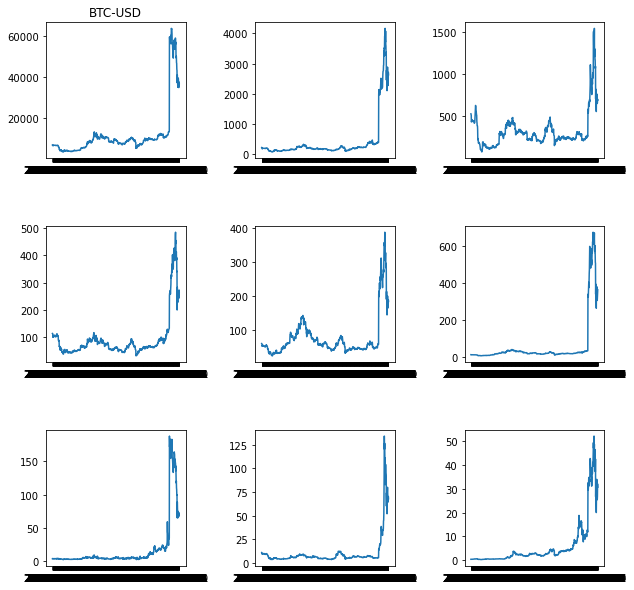

In [10]:
#Plot Stock Prices Data
plt.rcParams["figure.figsize"] = (10,10)
#stock_prices.pivot_table(index=stock_prices.index,values=stock_prices.columns).plot()

fig, axs = plt.subplots(3, 3, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5,wspace = 0.5);

axs[0, 0].plot(stock_prices.index,stock_prices['BTC-USD'])
axs[0, 0].set_title('BTC-USD')
axs[0, 1].plot(stock_prices.index,stock_prices['ETH-USD'])
axs[0, 2].plot(stock_prices.index,stock_prices['BCH-USD'])
axs[1, 0].plot(stock_prices.index,stock_prices['XMR-USD'])
axs[1, 1].plot(stock_prices.index,stock_prices['LTC-USD'])
axs[1, 2].plot(stock_prices.index,stock_prices['BNB-USD'])
axs[2, 0].plot(stock_prices.index,stock_prices['FIL-USD'])
axs[2, 1].plot(stock_prices.index,stock_prices['ETC-USD'])
axs[2, 2].plot(stock_prices.index,stock_prices['LINK-USD'])


plt.show()

Unsurprisingly,the purple line that is bitcoin dominates closing price over the years


In [11]:
CCI30.sort_index(inplace=True)

C:\Users\kenne\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

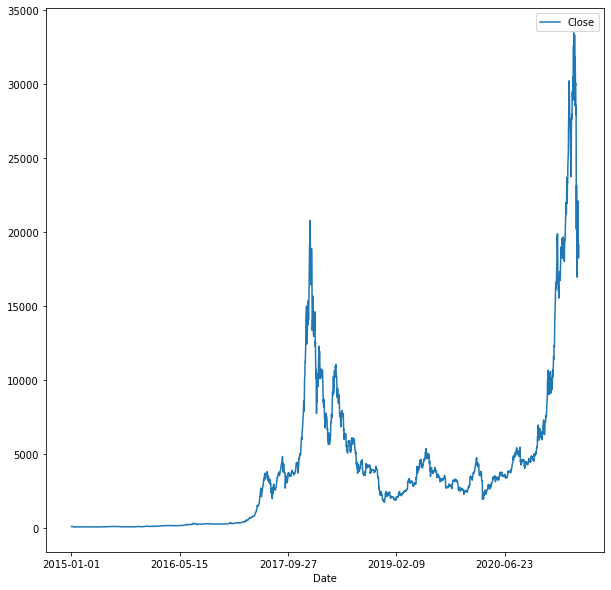

In [12]:
#plot CCI30 data
plt.rcParams["figure.figsize"] = (10,10)
CCI30.plot( y='Close')

This graph looks identical to the Bitcoin line in the stock prices data

We can already see that Bitcoin has a strong relationship to the CCI30 index. Lets now explore how many other stocks help to explain the entire CCi30 index

## PCA Analysis 


In [13]:
stock_scaled = scale(stock_prices)
stock_price_PCA = PCA().fit(stock_scaled)

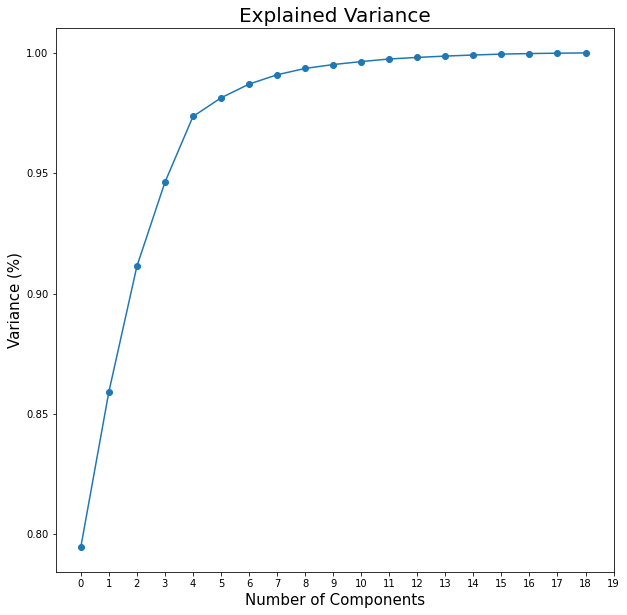

In [14]:
# plot the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(stock_price_PCA.explained_variance_ratio_),marker='o')

# define the labels & title
plt.xlabel('Number of Components', fontsize = 15)
plt.ylabel('Variance (%)', fontsize = 15) 
plt.title('Explained Variance', fontsize = 20)

plt.xticks(np.arange(0,len(stock_prices.columns)+1,1))

# show the plot
plt.show()

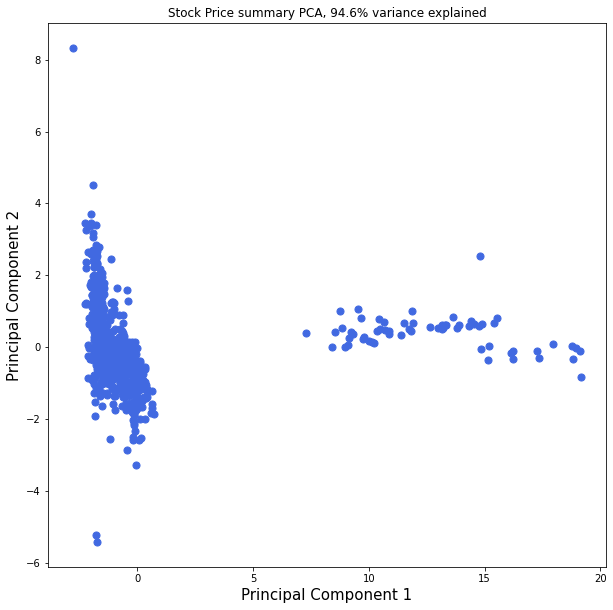

In [58]:
# create a PCA modified dataset
pca_dataset = PCA(n_components=4).fit(stock_scaled).transform(stock_scaled)

# store it in a new data frame
pca_dataset= pd.DataFrame(data = pca_dataset, columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])
pc_var = 100 * stock_price_PCA.explained_variance_ratio_.cumsum()[3]
# define a figure
plt.figure()

# define the label and title
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title(f'Stock Price summary PCA, {pc_var:.1f}% variance explained')

# plot the figure
plt.scatter(pca_dataset['principal component 1'], pca_dataset['principal component 2'], c='royalBlue', s = 50)

In [59]:
pca_dataset

,principal component 1,principal component 2,principal component 3,principal component 4
0,0.199365,-1.487350,1.270371,-0.458724
1,0.116836,-1.034018,1.657588,-0.293691
2,0.069943,-1.179238,2.024334,0.097944
3,-0.423952,-1.064639,1.685004,0.409056
4,-0.339238,-0.743545,1.992810,0.443062
...,...,...,...,...
787,9.117588,0.054253,-0.016058,-0.856428
788,8.396734,-0.004146,-0.103652,-0.798709
789,8.969588,-0.003007,-0.150592,-0.763605
790,10.140095,0.159115,-0.002220,-0.868520


In [60]:
#Loading Analysis for our PCA 
from sklearn import decomposition
from sklearn.preprocessing import scale
pca = PCA(n_components=4).fit(stock_scaled)



In [61]:
pca.components_.T

array([[ 0.24881882,  0.05950472, -0.04248736, -0.00131836],
       [ 0.23746208, -0.18362989,  0.1904717 , -0.18169753],
       [ 0.25371281,  0.06750859, -0.06616912,  0.06338943],
       [ 0.24685214,  0.02067767, -0.16807149,  0.17283351],
       [ 0.23575567,  0.05050218,  0.03987661, -0.19748124],
       [ 0.18503057, -0.22644332,  0.4401088 , -0.42405375],
       [ 0.22435304, -0.00815708,  0.13116497, -0.31390118],
       [ 0.25310193,  0.04070615, -0.04647685, -0.03051374],
       [ 0.24022325,  0.08197503, -0.18403073,  0.28746703],
       [ 0.24286509,  0.03787183, -0.20257304,  0.12051514],
       [ 0.24543554, -0.05084396,  0.05326344, -0.18816293],
       [ 0.24748273,  0.09648928, -0.1204939 ,  0.20933616],
       [ 0.25010558,  0.07604288, -0.01179653,  0.06943099],
       [-0.05245515,  0.54309344,  0.70743602,  0.36623715],
       [-0.03533885,  0.75690421, -0.27043734, -0.52578407],
       [ 0.25082711,  0.06779183, -0.06491594,  0.09507097],
       [ 0.24404556,  0.

In [64]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2','PC3','PC4'], index=stock_prices.columns)
loadings

,PC1,PC2,PC3,PC4
ADA-USD,0.248819,0.059505,-0.042487,-0.001318
BCH-USD,0.237462,-0.183630,0.190472,-0.181698
BNB-USD,0.253713,0.067509,-0.066169,0.063389
BTC-USD,0.246852,0.020678,-0.168071,0.172834
DOGE-USD,0.235756,0.050502,0.039877,-0.197481
EOS-USD,0.185031,-0.226443,0.440109,-0.424054
ETC-USD,0.224353,-0.008157,0.131165,-0.313901
ETH-USD,0.253102,0.040706,-0.046477,-0.030514
FIL-USD,0.240223,0.081975,-0.184031,0.287467
LINK-USD,0.242865,0.037872,-0.202573,0.120515


[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [19] columns of the input dataframe.
[pca] >Fitting using PCA..

[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


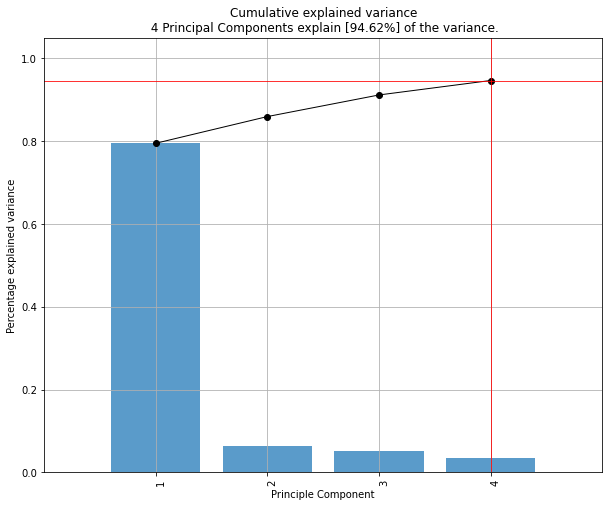

<Figure size 720x720 with 0 Axes>

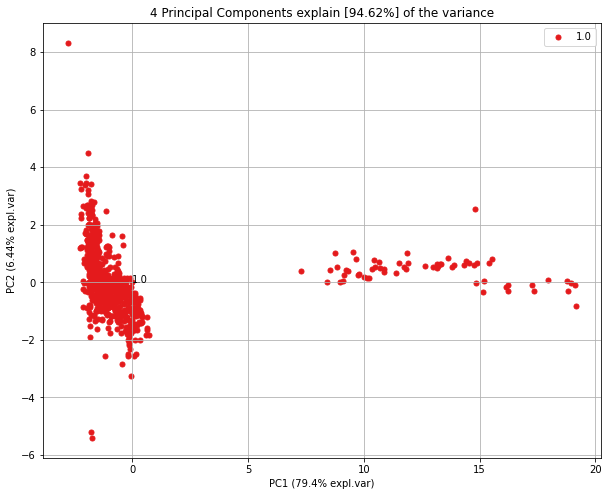

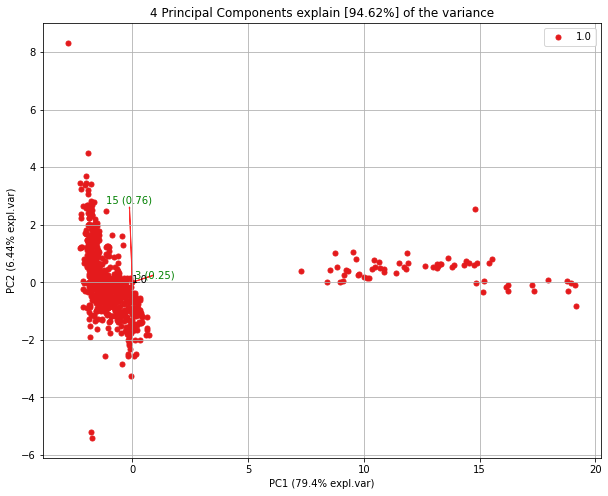

In [54]:
!pip install pca
from pca import pca


pca = pca(n_components = 4)

results = pca.fit_transform(stock_scaled)
# Plot explained variance
fig, ax = pca.plot()

# Scatter first 2 PCs
fig, ax = pca.scatter()
fig,ax=pca.biplot(n_feat = 2)